# the goal is to create an adj matrix for the whole period

In [1]:
import pandas as pd
import numpy as np

In [2]:
#s11=pd.read_csv('/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/82 replicate the figure in the paper 2020423/95 updated email from CRA and city commissioner/df_comm&cra_s1.csv',index_col=0,parse_dates=['Sent'])
s1=pd.read_csv('df_comm&cra_s10403.csv',index_col=0,parse_dates=['Sent'])
s2=pd.read_csv('df_comm&cra_s20403.csv',index_col=0,parse_dates=['Sent'])
s3=pd.read_csv('df_comm&cra_s30403.csv',index_col=0,parse_dates=['Sent'])
s4=pd.read_csv('df_comm&cra_s40403.csv',index_col=0,parse_dates=['Sent'])




In [3]:
s1['date_sent']
date_email = pd.to_datetime(s1['date_sent'])
date_email

148   2012-05-10
165   2012-06-13
32    2012-06-21
14    2012-07-02
28    2012-07-16
         ...    
93    2014-01-13
179   2014-01-13
77           NaT
134          NaT
162          NaT
Name: date_sent, Length: 200, dtype: datetime64[ns]

In [4]:
allemail=pd.concat([s1, s2,s3,s4], ignore_index=True)


data_new = allemail.copy() 
data_new['date_sent']=pd.to_datetime(data_new.date_sent)           
data_new = data_new.sort_values(by = ['date_sent']) 


In [5]:
pd.set_option('display.max_columns', None)
data_new.head(5)


,filenm,From,Sent,To,CC,Bcc,Subject,Attachments,Importance,isThread,isAutoMessage,isDisplacement,hasAllCapLine,hasBadDate,Body,timestamp,date_sent,time_sent,cc,nb_words,nb_chars,body_len,body,mn_nb_words,std_nb_words,mn_nb_chars,std_nb_chars,email_count
0,16179_fn_14-1-Governance2012-1-0_ln_5504.txt,andrewgillum,"Thursday, May 10, 2012 7:56 PM",scottmaddox,invalid_nan,NaN,Fwd: FYI ONLY - Request for Public Record,NaN,NaN,False,False,False,False,False,"['FYI', '--------Andrew Gillum', 'Begin forwar...",1.336676e+09,2012-05-10,18:56,INVALID_TYPE,6,45,50,FYI --------Andrew Gillum Begin forwarded mess...,107.412698,144.088194,549.126984,745.183080,63
1,18708_fn_23-1-PaigeCarter-Smith2012-2015_ln_32...,nancymiller,"Wednesday, June 13, 2012 5:08 PM",nancymiller,invalid_nan,NaN,"Coffee and Conversation with Nancy Miller, Jun...",NaN,NaN,False,False,False,False,False,"['Coffee and Conversation with Nancy Miller', ...",1.339604e+09,2012-06-13,16:08,INVALID_TYPE,83,410,492,Coffee and Conversation with Nancy Miller Plea...,131.259036,128.464070,711.433735,687.615814,166
2,16329_fn_14-1-Governance2012-1-0_ln_13308.txt,scottmaddox,"Thursday, June 21, 2012 4:27 PM",dianaoropallo,lindarecio;davidworrell;kylephelps;paulwatts;k...,NaN,Re: FLCS ANNUAL BOD MEETING AND ELECTION,NaN,NaN,False,False,False,False,False,"['Me too!', 'Sent from SCM iPhone', 'On Jun 21...",1.340292e+09,2012-06-21,15:27,"Thomas G. Harrison; AprilSalter; Costigan, She...",24,111,134,"Me too! Sent from SCM iPhone On Jun 21, 2012, ...",121.687500,203.217958,601.104167,1031.169760,48
3,62243_fn_15-1-HunterHarp2012-1-0_ln_48952.txt,bryandesloge,"Monday, July 02, 2012 3:36 PM",leedaniel,brendatanner;bryandesloge;georgiaackerman;nanc...,NaN,Re: Sports Complex Feasibility Study,NaN,NaN,False,False,False,False,False,"['Imagine my surprise - Ill be there !!', 'Bry...",1.341240e+09,2012-07-02,14:36,"Ackerman, Georgia; Barber, Chucha; Bauer, Marc...",164,911,1074,Imagine my surprise - Ill be there !! Bryan De...,102.857143,51.747556,550.714286,271.679783,7
4,16395_fn_14-1-Governance2012-1-0_ln_18538.txt,andrew.gillum@talgov.com,"Monday, July 16, 2012 12:59 PM",pcartersmith@hotmail.com;maddox@maddoxhorne.co...,invalid_nan,NaN,FYI - Format and other information related to ...,BBEF Environmental Forum Format.pdf,NaN,False,False,False,False,False,"['FYI', 'Angie', 'Angela G. Whitaker', 'Aide t...",1.342440e+09,2012-07-16,11:59,INVALID_TYPE,84,522,605,FYI Angie Angela G. Whitaker Aide to Mayor Pro...,131.344828,175.227460,725.241379,953.526487,29


try to get the adj matrix of whole period



In [9]:
def nameToIndexDict(l_unique_names):
# create name to index dictionary and index to name dictionary for later use
# returns (name2id, id2name)
    name2id = {}
    for idx,name in enumerate(l_unique_names):    # unique_names
        name2id[name] = idx

    id2name = {}
    for idx, name in enumerate(l_unique_names):
        id2name[idx] = name

    return name2id, id2name

In [10]:
#email to adj matrix.

def process_data_both_new(infile):
    df_email = pd.read_csv(infile,index_col = 0)

    from_list = df_email['From'].values.tolist()
    #for i in range(len(from_list)):
    #    from_list[i] = eval(from_list[i])
    #df_email['From'] = from_list

    to_list = df_email['To'].values.tolist()
    #for i in range(len(to_list)):
    #    to_list[i] = eval(to_list[i])
    #df_email['To'] = to_list

    cc_list = df_email['CC'].values.tolist()

    unique_people = set()
    for i in range(len(from_list)):
        unique_people.add(from_list[i])

    for i in range(len(cc_list)):
        for lst in cc_list[i].split(';'):
            unique_people.add(lst)

    for i in range(len(to_list)):
        for lst in to_list[i].split(';'):
            unique_people.add(lst) #add 

    unique_people = list(unique_people)
    unique_people.sort()
    name2id, id2name = nameToIndexDict(unique_people)

    commissioner_dict = {}
    commissioner_dict['scottmaddox'] = ['allieflemingforscottmaddox',
                                    'maddoxscos',
                                    'maddoxscoy',
                                    'maddoxscott',
                                    'scofcharlesmaddox',
                                    'scofcharlesmaddox@gmail.com',
                                    'scott.maddox=talgov.com@mail13.us2.mcsv.net',
                                    'scott.maddox=talgov.com@mail24.wdc03.rsgsv.net',
                                    'scott.maddox=talgov.com@mail65.atl11.rsgsv.net',
                                    'scott.maddox@talgov.com',
                                    'scott.maddox@tallgov.com',
                                    'scott@scottmaddox.com',
                                    'scott@scottmaddox.com>',
                                    'scott@scottmaddox2012.com',
                                    'scottcharlesmaddox',
                                    'scottcharlesmaddox@gmail.com',
                                    'scottmaddox',
                                    'scottmaddox2012@g1nail.com',
                                    'scottmaddox2012@gmail.com',
                                    'scottmaddox@scottmaddox.com',
                                    'scottmaddoxemail',
                                    'scottmaddoxscott',
                                    'scoi.maddox@talgov.com',
                                    'maddox@maddoxhorne.com',
                                    'scott@govinc.net',
                                    'shamaddox@embarqmail.com',
                                    'scof.maddox@talgov.com',
                                    'scos.maddox@talgov.com',
                                    'sha_maddox',
                                    ]

    commissioner_dict['andrewgillum'] = ['agillum@pfaw.org',
                                    'andrew.gillum@tagov.com',
                                    'andrew.gillum@talgov.com',
                                    'andrew.gillum@tallgov.com',
                                    'andrew@andrewgillum.com',
                                    'andrewgillum',
                                    'andrewgillum@talgov.com',
                                    'andrewgillumandrew',
                                    'andrewgillumcampaign',
                                    'gillumandrew',
                                    'info@andrewgillum.com',
                                    'gilluma@gmail.com',
                                    'gilluma@talgov.com',
                                    'andrewgilliam',
                                    'andrewgillium',
                                    'andrewgillams', 
                                    ]

    commissioner_dict['markmustian'] = ['mark.mustian@talgov.com',
                                    'mark@markmustian.com',
                                    'markmustian',
                                    'mmustian@ngn-tally.com',
                                    'mmustian@ngnlaw.com',
                                    'mustianmark',
                                    ]
    commissioner_dict['gilziffer'] = ['gil.ziffer@talgov.co',
                                    'gil.ziffer@talgov.com',
                                    'gil.ziffer@tallgov.com',
                                    'gilziffer',
                                    'gilziffer@talgov.com',
                                    'gilziffergil',
                                    'ziffergil',
                                    'gil@ziffberry.com'
                                    ]
    commissioner_dict['curtisrichardson'] = ['curtis.richardson@talgov.com',
                                          'curtisrichardson',
                                          'richardsoncurtis',
                                          'ultis_richardson',
                                          'cabaide@aol.com',
                                          ]

    commissioner_dict['nancymiller'] = ['millernancy',
                                    'millernancyrick',
                                    'nancy.miller@talgov.co',
                                    'nancy.miller@talgov.com',
                                    'nancy.miller@talgov.com>',
                                    'nancy.miller@tallgov.com',
                                    'nancymiller',
                                    'nancymillernancy',
                                    'temnancymiller',
                                    ]

    commissioner_dict['johnmarks'] = ['john.marks@talgov.com',
                                'john.marks@tallgov.com',
                                'john.marksiii@talgov.com',
                                'john.markslll@talgov.com',
                                'johnmarks',
                                'johnmarksiii',
                                'johnmarksiii@talgov.com',
                                'marksj@talgov.com',
                                'marksjohn',
                                'mayorjohnmarks',
                                  ]

    commissioner_list = []
    for v in commissioner_dict.values():
      commissioner_list += v

    cra_dict = {}
    cra_dict['johndailey'] = ['daileyj@leoncountyfl.gov',
                            'daileyj@leoncountygl.gov',
                            'daileyjgov',
                            'daileyjohn',
                            'john_dailey@comcast.net',
                            'johndailey',
                            'johndailey@leoncountyfl.gov',
                          ]
    cra_dict['bryandesloge'] = ['bdesloge@icloud.com',
                            'bryandesloge',
                            'desloge.bryan@gmail.com',
                            'deslogeb@leoncountyfl.gov',
                            'deslogeb@leoncountyﬂ.gov',
                            'deslogebryan',
                            'deslogebryan@leoncountyfl.gov',
                            'bryan@deslogemedical.com',
                            ]

    #cra_dict['jessicamiller'] = ['jessica.miller@talgov.com',
                            #'jessica.miller@talgov.com>',
                            # 'jessicamiller',
                            # 'jmiller@kidsincorporated.org',
                            # 'jmiller@talchamber.com',
                            # ]
    cra_dict['janesauls'] = ['janesauls',
                        'saulsj@leoncountyfl.gov',
                        'saulsj@mail.co.leon.fl.us',
                        ]

    cra_dict['nickmaddox'] = ['maddoxn@leoncountyfl.com',
                            'maddoxn@leoncountyfl.gov',
                            'maddoxn@leoncountyﬂ.gov',
                            'maddoxnick',
                            'nick.maddox@talgov.com',
                            'nickmaddox',
                            'maddox.nicholas@gmail.com',
                          ]

    cra_dict['lindleymary'] = ['lindleym@leoncountyﬂ.gov',
                            'lindleymaryann',
                            'lindleym@leoncountyfl.gov',
                            'mary_lindley',
                            'marylindley',
                          ]

    cra_dict['kristindozer'] = ['dozierk',
                            'dozierk@leoncountyﬂ.gov',
                            'dozierkristin',
                            'kristindozier@gmail.com',
                            'kristindozer',
                            'dozierk@leoncountyfl.gov',
                            'kristindozier',
                            'kdozier@maddogweb.com',
                            'kristindozier@gmail.com',
                            ]

    cra_dict['billproctor'] = ['bill.proctor@talgov.com',
                            'proctorb@leoncounty.fl.gov',
                            'proctorb@leoncountyfl.com',
                            'proctorb@leoncountyﬂ.gov',
                            'proctorbgov',
                            'proctorbill',
                            'proctorb@leoncountyfl.gov',
                            'billproctor',
                            ]

    cra_list = []
    for v in cra_dict.values():
      cra_list += v

    total_list = cra_list + commissioner_list

    nodes_to_add = list(cra_dict.keys()) + list(commissioner_dict.keys())

    cra_idx_list = []
    for i,people in enumerate(unique_people):
        if people in cra_list:
            cra_idx_list.append(i)

    commissioner_idx_list = []
    for i,people in enumerate(unique_people):
        if people in commissioner_list:
            commissioner_idx_list.append(i)
    total_idx_list = cra_idx_list + commissioner_idx_list

    num_people = len(unique_people)
    idx_mapping = {}
    cra_idx_list_new = []
    for person,idx_list in cra_dict.items():
        global_indices = []
        for idx in idx_list:
            if idx not in unique_people:
                continue
            global_idx = unique_people.index(idx)
            global_indices.append(global_idx)
        idx_mapping[person] = global_indices
        num_people +=1
        #cra_idx_list_new.append(num_people) 

    commissioner_idx_list_new = []
    for person,idx_list in commissioner_dict.items():
        global_indices = []
        for idx in idx_list:
            if idx not in unique_people:
                continue
            global_idx = unique_people.index(idx)
            global_indices.append(global_idx)
        
        idx_mapping[person] = global_indices
        num_people +=1 
        #commissioner_idx_list_new.append(num_people) 


    col_names = []
    for idx,name in enumerate(idx_mapping):    # unique_names
        #print(name, idx_mapping[name])
        col_names.append(name)
    col_names

    ### plot from to 

    # build adj_mat
    adj_mat_from_to = np.zeros((len(idx_mapping),len(idx_mapping)))

    for i in range(len(from_list)):
        #s = name2id[from_list[i]] # id of the sender

        s_global_idx = unique_people.index(from_list[i]) # id of the sender

        # found index of this person in id_mapping 
        s_idx = -1
        for idx,name in enumerate(idx_mapping):    # unique_names
            #print(name, idx_mapping[name])
            if s_global_idx in idx_mapping[name]: # get index of the name in idx_mapping
                s_idx = idx
        if s_idx == -1:
              #print("Error: didn't find index for s_global_idx ",s_global_idx)
              continue

        rs = to_list[i].split(';')
        for j in range(len(rs)):
            if rs[j] != '':
                #r = name2id[rs[j]]  # id of the receiver
                r_global_idx = unique_people.index(rs[j])  # id of the receiver

                # found index of this person in id_mapping 
                r_idx = -1
                for idx,name in enumerate(idx_mapping):    # unique_names
                    #print(name, idx_mapping[name])
                    if r_global_idx in idx_mapping[name]: # get index of the name in idx_mapping
                        r_idx = idx
                if r_idx == -1:
                      #print("Error: didn't find index for r_global_idx ",r_global_idx)
                      continue
                #print(s_idx,r_idx)
                adj_mat_from_to[s_idx,r_idx] += 1
    #             adj_mat[s,r] += 1/num_TO_CC[i]

    adj_mat_from_to_directed = np.copy(adj_mat_from_to)

    #adj_mat_from_to_undirected = adj_mat_from_to + adj_mat_from_to.T #这个对角线数字会翻倍，需要修改。
    #adj_mat_from_to_undirected = adj_mat_from_to + adj_mat_from_to.T 
    adj_mat_from_to_undirected = adj_mat_from_to+adj_mat_from_to.T - np.diag(np.diag(adj_mat_from_to))


    #adj_mat_from_to = np.triu(adj_mat_from_to, 1)
    adj_mat_from_to_directed_pd = pd.DataFrame(data=adj_mat_from_to_directed, index=col_names, columns=col_names)
    adj_mat_from_to_undirected_pd = pd.DataFrame(data=adj_mat_from_to_undirected, index=col_names, columns=col_names)

    ### plot from cc 

    # build adj_mat
    adj_mat_from_cc = np.zeros((len(idx_mapping),len(idx_mapping)))

    for i in range(len(from_list)):
        #s = name2id[from_list[i]] # id of the sender

        s_global_idx = unique_people.index(from_list[i]) # id of the sender

        # found index of this person in id_mapping 
        s_idx = -1
        for idx,name in enumerate(idx_mapping):    # unique_names
            #print(name, idx_mapping[name])
            if s_global_idx in idx_mapping[name]: # get index of the name in idx_mapping
                s_idx = idx
        if s_idx == -1:
              #print("Error: didn't find index for s_global_idx ",s_global_idx)
              continue

        rs = cc_list[i].split(';')
        for j in range(len(rs)):
            if rs[j] != '' :
                #r = name2id[rs[j]]  # id of the receiver
                r_global_idx = unique_people.index(rs[j])  # id of the receiver

                # found index of this person in id_mapping 
                r_idx = -1
                for idx,name in enumerate(idx_mapping):    # unique_names
                    #print(name, idx_mapping[name])
                    if r_global_idx in idx_mapping[name]: # get index of the name in idx_mapping
                        r_idx = idx
                if r_idx == -1:
                      #print("Error: didn't find index for r_global_idx ",r_global_idx)
                      continue
                #print(s_idx,r_idx)
                adj_mat_from_cc[s_idx,r_idx] += 1
    #             adj_mat[s,r] += 1/num_TO_CC[i]

    adj_mat_from_cc_directed = np.copy(adj_mat_from_cc)
    #adj_mat_from_cc_undirected = adj_mat_from_cc + adj_mat_from_cc.T
    #adj_mat_from_to = np.triu(adj_mat_from_to, 1)
    adj_mat_from_cc_undirected = adj_mat_from_cc+adj_mat_from_cc.T - np.diag(np.diag(adj_mat_from_cc))

    adj_mat_from_cc_directed_pd = pd.DataFrame(data=adj_mat_from_cc_directed, index=col_names, columns=col_names)
    adj_mat_from_cc_undirected_pd = pd.DataFrame(data=adj_mat_from_cc_undirected, index=col_names, columns=col_names)


    adj_mat_from_to_and_cc_directed = adj_mat_from_to_directed + adj_mat_from_cc_directed
    adj_mat_from_to_and_cc_directed_pd = pd.DataFrame(data=adj_mat_from_to_and_cc_directed, index=col_names, columns=col_names)

    adj_mat_from_to_and_cc_undirected = adj_mat_from_to_undirected + adj_mat_from_cc_undirected
    adj_mat_from_to_and_cc_undirected_pd = pd.DataFrame(data=adj_mat_from_to_and_cc_undirected, index=col_names, columns=col_names)
    return adj_mat_from_to_and_cc_directed_pd









In [12]:
#directely calculate whole stage adj matrix
import pandas as pd
import glob


df_email = data_new

from_list = df_email['From'].values.tolist()
#for i in range(len(from_list)):
#    from_list[i] = eval(from_list[i])
#df_email['From'] = from_list

to_list = df_email['To'].values.tolist()
#for i in range(len(to_list)):
#    to_list[i] = eval(to_list[i])
#df_email['To'] = to_list

cc_list = df_email['CC'].values.tolist()

unique_people = set()
for i in range(len(from_list)):
    unique_people.add(from_list[i])

for i in range(len(cc_list)):
    for lst in cc_list[i].split(';'):
        unique_people.add(lst)

for i in range(len(to_list)):
    for lst in to_list[i].split(';'):
        unique_people.add(lst) #add 里面有重复？

unique_people = list(unique_people)
unique_people.sort()
name2id, id2name = nameToIndexDict(unique_people)

commissioner_dict = {}
commissioner_dict['scottmaddox'] = ['allieflemingforscottmaddox',
                                'maddoxscos',
                                'maddoxscoy',
                                'maddoxscott',
                                'scofcharlesmaddox',
                                'scofcharlesmaddox@gmail.com',
                                'scott.maddox=talgov.com@mail13.us2.mcsv.net',
                                'scott.maddox=talgov.com@mail24.wdc03.rsgsv.net',
                                'scott.maddox=talgov.com@mail65.atl11.rsgsv.net',
                                'scott.maddox@talgov.com',
                                'scott.maddox@tallgov.com',
                                'scott@scottmaddox.com',
                                'scott@scottmaddox.com>',
                                'scott@scottmaddox2012.com',
                                'scottcharlesmaddox',
                                'scottcharlesmaddox@gmail.com',
                                'scottmaddox',
                                'scottmaddox2012@g1nail.com',
                                'scottmaddox2012@gmail.com',
                                'scottmaddox@scottmaddox.com',
                                'scottmaddoxemail',
                                'scottmaddoxscott',
                                'scoi.maddox@talgov.com',
                                'maddox@maddoxhorne.com',
                                'scott@govinc.net',
                                'shamaddox@embarqmail.com',
                                'scof.maddox@talgov.com',
                                'scos.maddox@talgov.com',
                                'sha_maddox',
                                ]

commissioner_dict['andrewgillum'] = ['agillum@pfaw.org',
                                'andrew.gillum@tagov.com',
                                'andrew.gillum@talgov.com',
                                'andrew.gillum@tallgov.com',
                                'andrew@andrewgillum.com',
                                'andrewgillum',
                                'andrewgillum@talgov.com',
                                'andrewgillumandrew',
                                'andrewgillumcampaign',
                                'gillumandrew',
                                'info@andrewgillum.com',
                                'gilluma@gmail.com',
                                'gilluma@talgov.com',
                                'andrewgilliam',
                                'andrewgillium',
                                'andrewgillams', 
                                ]

commissioner_dict['markmustian'] = ['mark.mustian@talgov.com',
                                'mark@markmustian.com',
                                'markmustian',
                                'mmustian@ngn-tally.com',
                                'mmustian@ngnlaw.com',
                                'mustianmark',
                                ]
commissioner_dict['gilziffer'] = ['gil.ziffer@talgov.co',
                                'gil.ziffer@talgov.com',
                                'gil.ziffer@tallgov.com',
                                'gilziffer',
                                'gilziffer@talgov.com',
                                'gilziffergil',
                                'ziffergil',
                                'gil@ziffberry.com'
                                ]
commissioner_dict['curtisrichardson'] = ['curtis.richardson@talgov.com',
                                      'curtisrichardson',
                                      'richardsoncurtis',
                                      'ultis_richardson',
                                      'cabaide@aol.com',
                                      ]

commissioner_dict['nancymiller'] = ['millernancy',
                                'millernancyrick',
                                'nancy.miller@talgov.co',
                                'nancy.miller@talgov.com',
                                'nancy.miller@talgov.com>',
                                'nancy.miller@tallgov.com',
                                'nancymiller',
                                'nancymillernancy',
                                'temnancymiller',
                                ]

commissioner_dict['johnmarks'] = ['john.marks@talgov.com',
                            'john.marks@tallgov.com',
                            'john.marksiii@talgov.com',
                            'john.markslll@talgov.com',
                            'johnmarks',
                            'johnmarksiii',
                            'johnmarksiii@talgov.com',
                            'marksj@talgov.com',
                            'marksjohn',
                            'mayorjohnmarks',
                              ]

commissioner_list = []
for v in commissioner_dict.values():
  commissioner_list += v

cra_dict = {}
cra_dict['johndailey'] = ['daileyj@leoncountyfl.gov',
                        'daileyj@leoncountygl.gov',
                        'daileyjgov',
                        'daileyjohn',
                        'john_dailey@comcast.net',
                        'johndailey',
                        'johndailey@leoncountyfl.gov',
                      ]
cra_dict['bryandesloge'] = ['bdesloge@icloud.com',
                        'bryandesloge',
                        'desloge.bryan@gmail.com',
                        'deslogeb@leoncountyfl.gov',
                        'deslogeb@leoncountyﬂ.gov',
                        'deslogebryan',
                        'deslogebryan@leoncountyfl.gov',
                        'bryan@deslogemedical.com',
                        ]

#cra_dict['jessicamiller'] = ['jessica.miller@talgov.com',
                        #'jessica.miller@talgov.com>',
                        # 'jessicamiller',
                        # 'jmiller@kidsincorporated.org',
                        # 'jmiller@talchamber.com',
                        # ]
cra_dict['janesauls'] = ['janesauls',
                    'saulsj@leoncountyfl.gov',
                    'saulsj@mail.co.leon.fl.us',
                    ]

cra_dict['nickmaddox'] = ['maddoxn@leoncountyfl.com',
                        'maddoxn@leoncountyfl.gov',
                        'maddoxn@leoncountyﬂ.gov',
                        'maddoxnick',
                        'nick.maddox@talgov.com',
                        'nickmaddox',
                        'maddox.nicholas@gmail.com',
                      ]

cra_dict['lindleymary'] = ['lindleym@leoncountyﬂ.gov',
                        'lindleymaryann',
                        'lindleym@leoncountyfl.gov',
                        'mary_lindley',
                        'marylindley',
                      ]

cra_dict['kristindozer'] = ['dozierk',
                        'dozierk@leoncountyﬂ.gov',
                        'dozierkristin',
                        'kristindozier@gmail.com',
                        'kristindozer',
                        'dozierk@leoncountyfl.gov',
                        'kristindozier',
                        'kdozier@maddogweb.com',
                        'kristindozier@gmail.com',
                        ]

cra_dict['billproctor'] = ['bill.proctor@talgov.com',
                        'proctorb@leoncounty.fl.gov',
                        'proctorb@leoncountyfl.com',
                        'proctorb@leoncountyﬂ.gov',
                        'proctorbgov',
                        'proctorbill',
                        'proctorb@leoncountyfl.gov',
                        'billproctor',
                        ]

cra_list = []
for v in cra_dict.values():
  cra_list += v

total_list = cra_list + commissioner_list

nodes_to_add = list(cra_dict.keys()) + list(commissioner_dict.keys())

cra_idx_list = []
for i,people in enumerate(unique_people):
    if people in cra_list:
        cra_idx_list.append(i)

commissioner_idx_list = []
for i,people in enumerate(unique_people):
    if people in commissioner_list:
        commissioner_idx_list.append(i)
total_idx_list = cra_idx_list + commissioner_idx_list

num_people = len(unique_people)
idx_mapping = {}
cra_idx_list_new = []
for person,idx_list in cra_dict.items():
    global_indices = []
    for idx in idx_list:
        if idx not in unique_people:
            continue
        global_idx = unique_people.index(idx)
        global_indices.append(global_idx)
    idx_mapping[person] = global_indices
    num_people +=1
    #cra_idx_list_new.append(num_people) 

commissioner_idx_list_new = []
for person,idx_list in commissioner_dict.items():
    global_indices = []
    for idx in idx_list:
        if idx not in unique_people:
            continue
        global_idx = unique_people.index(idx)
        global_indices.append(global_idx)

    idx_mapping[person] = global_indices
    num_people +=1 
    #commissioner_idx_list_new.append(num_people) 


col_names = []
for idx,name in enumerate(idx_mapping):    # unique_names
    #print(name, idx_mapping[name])
    col_names.append(name)
col_names

### plot from to 

# build adj_mat
adj_mat_from_to = np.zeros((len(idx_mapping),len(idx_mapping)))

for i in range(len(from_list)):
    #s = name2id[from_list[i]] # id of the sender

    s_global_idx = unique_people.index(from_list[i]) # id of the sender

    # found index of this person in id_mapping 
    s_idx = -1
    for idx,name in enumerate(idx_mapping):    # unique_names
        #print(name, idx_mapping[name])
        if s_global_idx in idx_mapping[name]: # get index of the name in idx_mapping
            s_idx = idx
    if s_idx == -1:
          #print("Error: didn't find index for s_global_idx ",s_global_idx)
          continue

    rs = to_list[i].split(';')
    for j in range(len(rs)):
        if rs[j] != '':
            #r = name2id[rs[j]]  # id of the receiver
            r_global_idx = unique_people.index(rs[j])  # id of the receiver

            # found index of this person in id_mapping 
            r_idx = -1
            for idx,name in enumerate(idx_mapping):    # unique_names
                #print(name, idx_mapping[name])
                if r_global_idx in idx_mapping[name]: # get index of the name in idx_mapping
                    r_idx = idx
            if r_idx == -1:
                  #print("Error: didn't find index for r_global_idx ",r_global_idx)
                  continue
            #print(s_idx,r_idx)
            adj_mat_from_to[s_idx,r_idx] += 1
#             adj_mat[s,r] += 1/num_TO_CC[i]

adj_mat_from_to_directed = np.copy(adj_mat_from_to)

#adj_mat_from_to_undirected = adj_mat_from_to + adj_mat_from_to.T #这个对角线数字会翻倍，需要修改。
#adj_mat_from_to_undirected = adj_mat_from_to + adj_mat_from_to.T 
adj_mat_from_to_undirected = adj_mat_from_to+adj_mat_from_to.T - np.diag(np.diag(adj_mat_from_to))


#adj_mat_from_to = np.triu(adj_mat_from_to, 1)
adj_mat_from_to_directed_pd = pd.DataFrame(data=adj_mat_from_to_directed, index=col_names, columns=col_names)
adj_mat_from_to_undirected_pd = pd.DataFrame(data=adj_mat_from_to_undirected, index=col_names, columns=col_names)

### plot from cc 

# build adj_mat
adj_mat_from_cc = np.zeros((len(idx_mapping),len(idx_mapping)))

for i in range(len(from_list)):
    #s = name2id[from_list[i]] # id of the sender

    s_global_idx = unique_people.index(from_list[i]) # id of the sender

    # found index of this person in id_mapping 
    s_idx = -1
    for idx,name in enumerate(idx_mapping):    # unique_names
        #print(name, idx_mapping[name])
        if s_global_idx in idx_mapping[name]: # get index of the name in idx_mapping
            s_idx = idx
    if s_idx == -1:
          #print("Error: didn't find index for s_global_idx ",s_global_idx)
          continue

    rs = cc_list[i].split(';')
    for j in range(len(rs)):
        if rs[j] != '' :
            #r = name2id[rs[j]]  # id of the receiver
            r_global_idx = unique_people.index(rs[j])  # id of the receiver

            # found index of this person in id_mapping 
            r_idx = -1
            for idx,name in enumerate(idx_mapping):    # unique_names
                #print(name, idx_mapping[name])
                if r_global_idx in idx_mapping[name]: # get index of the name in idx_mapping
                    r_idx = idx
            if r_idx == -1:
                  #print("Error: didn't find index for r_global_idx ",r_global_idx)
                  continue
            #print(s_idx,r_idx)
            adj_mat_from_cc[s_idx,r_idx] += 1
#             adj_mat[s,r] += 1/num_TO_CC[i]

adj_mat_from_cc_directed = np.copy(adj_mat_from_cc)
#adj_mat_from_cc_undirected = adj_mat_from_cc + adj_mat_from_cc.T
#adj_mat_from_to = np.triu(adj_mat_from_to, 1)
adj_mat_from_cc_undirected = adj_mat_from_cc+adj_mat_from_cc.T - np.diag(np.diag(adj_mat_from_cc))

adj_mat_from_cc_directed_pd = pd.DataFrame(data=adj_mat_from_cc_directed, index=col_names, columns=col_names)
adj_mat_from_cc_undirected_pd = pd.DataFrame(data=adj_mat_from_cc_undirected, index=col_names, columns=col_names)


adj_mat_from_to_and_cc_directed = adj_mat_from_to_directed + adj_mat_from_cc_directed
adj_mat_from_to_and_cc_directed_pd = pd.DataFrame(data=adj_mat_from_to_and_cc_directed, index=col_names, columns=col_names)

adj_mat_from_to_and_cc_undirected = adj_mat_from_to_undirected + adj_mat_from_cc_undirected
adj_mat_from_to_and_cc_undirected_pd = pd.DataFrame(data=adj_mat_from_to_and_cc_undirected, index=col_names, columns=col_names)
    











In [13]:
 adj_mat_from_to_and_cc_directed_pd
    

,johndailey,bryandesloge,janesauls,nickmaddox,lindleymary,kristindozer,billproctor,scottmaddox,andrewgillum,markmustian,gilziffer,curtisrichardson,nancymiller,johnmarks
johndailey,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
bryandesloge,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,4.0,0.0
janesauls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nickmaddox,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
lindleymary,2.0,2.0,2.0,2.0,0.0,2.0,2.0,4.0,2.0,0.0,2.0,0.0,2.0,2.0
kristindozer,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
billproctor,3.0,3.0,3.0,3.0,0.0,3.0,4.0,4.0,3.0,0.0,3.0,0.0,3.0,0.0
scottmaddox,0.0,3.0,0.0,8.0,0.0,2.0,1.0,128.0,21.0,0.0,25.0,0.0,18.0,22.0
andrewgillum,2.0,3.0,0.0,0.0,0.0,4.0,0.0,9.0,4.0,0.0,4.0,2.0,3.0,1.0
markmustian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#adj_mat_from_to_and_cc_directed_pd.to_csv('whole stage adj matrix.csv')

# use adj matrix，draw email network figure

In [28]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
from datetime import datetime

import copy
plt.rcParams["font.weight"] = "normal"

def plot_network_directed(adj_mat,nodes_names, pic_name = 'test', savefig=False):
    #fig = plt.figure(figsize=(12,12))
    #fig.suptitle(pic_name,fontsize = 24, y=1.04)

    #group1 = ['bill_proctor','curtis_richardson']
    
    #if adj_mat[adj_mat !=0].mean() < 1.8: # in case number is too low, make points larger
     #   adj_mat = adj_mat * 15
        
    #if adj_mat[adj_mat !=0].mean() < 3 and adj_mat[adj_mat !=0].mean() >=1.8 : # in case number is too low, make points larger
     #   adj_mat = adj_mat * 2
    
    
    group1=city_commissioner
    group1_list=[]
    for i,people in enumerate(nodes_names):
        if people in group1:
            group1_list.append(i)
    group1_list

    group2 = cra
    group2_list=[]
    for i,people in enumerate(nodes_names):
        if people in group2:
            group2_list.append(i)
    group2_list

    name2id = {}
    id2name = {}
    for i in range(len(nodes_names)):
      name2id[nodes_names[i]] = i
      id2name[i] = nodes_names[i]


    # new
    fig = plt.figure(figsize=(20,14))
    #fig.suptitle(pic_name,fontsize = 24, y=1.04)
    #fig.text(.5, 1.005, 'edge thickness: #emails weighted by #receivers, then normalized $\in$(0,1)\n node size: #emails related', fontsize = 20, ha='center')

    G = nx.DiGraph(directed=True) #change to directed network
    G.add_nodes_from(nodes_names)
    networks = [1,2,3]

    networks_list = []
    for i in range(len(nodes_names)):
        if i in group1_list:
            networks_list.append(1)
        else:
            networks_list.append(2)
        

    # map color
    node_network_map = dict(zip(nodes_names, networks_list))
    colors = ['red',  'green']
    color_map = dict(zip(networks, colors))

    print("nodes_names: ",len(nodes_names))
    print("adj_mat: ",adj_mat.shape)
    for row, row_val in enumerate(nodes_names):
        for col, col_val in enumerate(nodes_names):
            #if col < row and adj_mat[row, col] != 0.0:
            if adj_mat[row, col] != 0.0 and col != row:
                G.add_edge(row_val, col_val)

    nodes_by_color = {val: [node for node in G if color_map[node_network_map[node]] == val]
                      for val in colors}

    pos = nx.circular_layout(G)
    #pos = nx.spring_layout(G)

    radii = [3,6,10]  # for concentric circles

    for ea in pos.keys():
        new_r = 1
        if ea in nodes_by_color['red']:
            new_r = radii[0]
        elif ea in nodes_by_color['green']:
            new_r = radii[2]
        else:
            pass
        pos[ea] *= new_r   # reposition nodes as concentric circles

    edge_width = []
    edges_list = G.edges()
    for s,t in edges_list:
        edge_width.append(adj_mat[name2id[s],name2id[t]])
    edge_width = np.array(edge_width)
    edge_width = edge_width*0.3

    node_size = adj_mat.sum(axis=0)+1
    node_size = 10*node_size
    labeling_idx = node_size.argsort()[::-1]
    labels = {}
    for i in labeling_idx:
        node = id2name[i]
        tmp = node#john_mark
        labels[node] = tmp

    node_sizes = {}
    node_sizes['red'] = node_size[group1_list]
    node_sizes['green'] = node_size[group2_list]
    #node_sizes['green'] = node_size[[item for item in np.arange(len(nodes_names)) if item not in (group1_list+group2_list)]]

    legend_labels = {'red': 'City Commissioner','green': 'CRA' }
    for color, node_names in nodes_by_color.items():
        local_node_size = node_sizes[color]
        nx.draw_networkx_nodes(G, pos=pos, node_size=local_node_size, edgecolors='darkblue', nodelist=node_names, node_color=color, label=legend_labels[color])

    nx.draw_networkx_edges(G, pos=pos, width=edge_width, edge_color = 'black')

    print("pos: ", len(pos), ' labels: ', len(labels))

    pos_new = copy.deepcopy(pos)
    for k, v in pos.items():
      print("k: ", k, " v: ",v)
      if k == 'curtisrichardson':
        pos_new[k][0] = pos_new[k][0] + 2
        pos_new[k][1] = pos_new[k][1]

      if k=='billproctor':
        pos_new[k][0] = pos_new[k][0] + 1.4



    nx.draw_networkx_labels(G, pos=pos_new, labels=labels, font_size=32, font_color='black')
    
    plt.legend(fontsize = 24, loc=1)
    plt.axis('off')

    #plt.subplots_adjust(left=0.4, bottom=0.1, right=0.9, top=0.2)
    #plt.subplots_adjust(left=0, bottom=0, right=1, top=4, wspace=0, hspace=0)
    plt.title(pic_name,fontsize = 24, fontweight='bold')

    plt.tight_layout()
    if savefig == True:
        savefig_out = pic_name.replace(' ','_')
        plt.savefig(savefig_out+'.png')
    plt.show()


In [29]:
city_commissioner=['scottmaddox',
 'andrewgillum',
 'markmustian',
 'gilziffer',
 'curtisrichardson',
 'nancymiller',
 'johnmarks']

cra= ['johndailey',
 'bryandesloge',
 'janesauls',
 'nickmaddox',
 'lindleymary',
 'kristindozer',
 'billproctor']

In [33]:
nodes_names = list(adj_mat_from_to_and_cc_directed_pd.columns)

directed_adj_np=adj_mat_from_to_and_cc_directed_pd.iloc[:,:].to_numpy().astype('float')
directed_adj_np

array([[  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.],
       [  0.,   3.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   4.,
          0.,   4.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   2.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  2.,   2.,   2.,   2.,   0.,   2.,   2.,   4.,   2.,   0.,   2.,
          0.,   2.,   2.],
       [  0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,
          0.,   0.,   0.],
       [  3.,   3.,   3.,   3.,   0.,   3.,   4.,   4.,   3.,   0.,   3.,
          0.,   3.,   0.],
       [  0.,   3.,   0.,   8.,   0.,   2.,   1., 128.,  21.,   0.,  25.,
          0.,  18.,  22.],
       [  2.,   3.,   0.,   0.,   0.,   4.,   0.,   9.,   4.,   0.,   4.,
          2.,   3.,   1.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0

nodes_names:  14
adj_mat:  (14, 14)
pos:  14  labels:  14
k:  johndailey  v:  [9.99999991e+00 1.90169078e-07]
k:  bryandesloge  v:  [9.00968842 4.33883774]
k:  janesauls  v:  [6.2348979  7.81831519]
k:  nickmaddox  v:  [2.22520972 9.74927917]
k:  lindleymary  v:  [-2.22520951  9.74927917]
k:  kristindozer  v:  [-6.23489799  7.81831519]
k:  billproctor  v:  [-9.0096885   4.33883833]
k:  scottmaddox  v:  [-3.00000000e+00 -2.05217605e-07]
k:  andrewgillum  v:  [-2.70290655 -1.30165121]
k:  markmustian  v:  [-1.87046886 -2.3454948 ]
k:  gilziffer  v:  [-0.66756303 -2.92478364]
k:  curtisrichardson  v:  [ 0.66756309 -2.92478364]
k:  nancymiller  v:  [ 1.87046883 -2.3454948 ]
k:  johnmarks  v:  [ 2.70290652 -1.30165121]


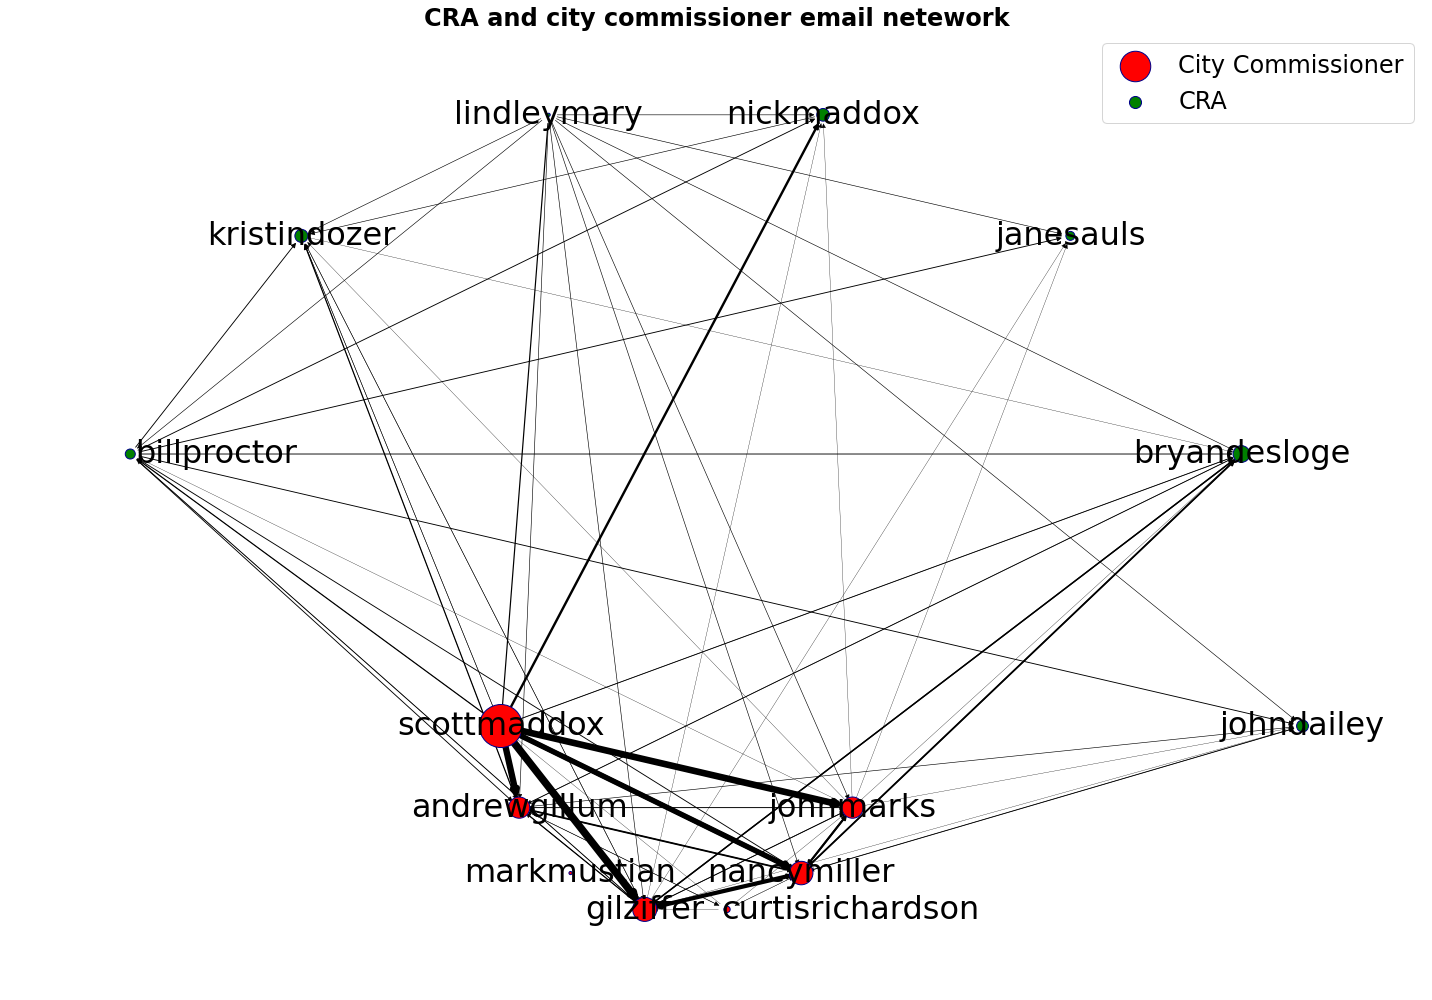

In [34]:
whole_stage=plot_network_directed(directed_adj_np,nodes_names, pic_name = 'CRA and city commissioner email netework', savefig=True)